# 5.2 Capstone Project - Data Storytelling

## Introduction:

In this notebook we're going to start exploring the dataset by answering a few simple questions about various parts of the data. 

But, before we start asking and answering any questions, we must make sure that the data still looks good after the wrangling step. 

Once this is assured, we will move on with the data exploration.



In [79]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:
 # Initial Data Load
df = pd.read_csv("FinalData.csv", sep = ',')

print(df.head())

                       ID          Name  Danceability  Energy   Key  Loudness  \
0  6J2VvzKwWc2f0JP5RQVZjq    YuveYuveYu         0.624   0.857  10.0    -6.250   
1  4HA34COgxgVJ6zK88UN4Ik   Gloryhammer         0.517   0.916   0.0    -4.933   
2  3W6Xik6Xxf06JuUoZSATlD        Nostos         0.251   0.894   8.0    -4.103   
3  2gGveBaLJQMtJ43X4UL5kH     Yggdrasil         0.469   0.743   1.0    -5.570   
4  1lRF81A1C9QoCgBcEop2zg  Incense&Iron         0.487   0.952   1.0    -4.429   

   Mode  Speechness  Acousticness  Instrumentalness  Liveness  Valence  \
0   0.0      0.0542      0.020800          0.206000     0.110    0.324   
1   1.0      0.0559      0.000182          0.001910     0.306    0.444   
2   0.0      0.0570      0.014400          0.000000     0.123    0.297   
3   0.0      0.0272      0.002220          0.000111     0.276    0.481   
4   0.0      0.0613      0.000228          0.000000     0.161    0.329   

     Tempo  Duration_ms  time_signature        Genre            Arti

In [81]:
# Just to make sure, we check if there are any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121815 entries, 0 to 121814
Data columns (total 18 columns):
ID                  121815 non-null object
Name                121815 non-null object
Danceability        121815 non-null float64
Energy              121815 non-null float64
Key                 121815 non-null float64
Loudness            121815 non-null float64
Mode                121815 non-null float64
Speechness          121815 non-null float64
Acousticness        121815 non-null float64
Instrumentalness    121815 non-null float64
Liveness            121815 non-null float64
Valence             121815 non-null float64
Tempo               121815 non-null float64
Duration_ms         121815 non-null float64
time_signature      121815 non-null float64
Genre               121815 non-null object
Artists             121808 non-null object
Popularity          121815 non-null int64
dtypes: float64(13), int64(1), object(4)
memory usage: 16.7+ MB


### Surprisingly, we find that there are nulls in the 'Artists' column, probably from some corruption during the csv write process, at the end of wrangling. 

In [82]:
print(df[df['Artists'].isnull()])

# Remove the null records completely
df = df.dropna()

# Check again
print(df.shape)
print(df.info())

print(df.head())

                           ID         Name  Danceability  Energy  Key  \
24425  66sqRn9QFYyvTRx0JuMXEe   AtlasHands         0.845   0.476  1.0   
24426  5XooUbpH4jIz9Fp9Rx2cD2  LittleTalks         0.846   0.774  6.0   
24427  1ePLnbnmhMYO5MnlLfjM2K     Snowship         0.850   0.570  5.0   
41586  66sqRn9QFYyvTRx0JuMXEe   AtlasHands         0.845   0.476  1.0   
41587  5XooUbpH4jIz9Fp9Rx2cD2  LittleTalks         0.846   0.774  6.0   
41588  1ePLnbnmhMYO5MnlLfjM2K     Snowship         0.850   0.570  5.0   
69094  6wArRmVIkwiEi2Ft3Oj1VZ     AveMaria         0.211   0.165  5.0   

       Loudness  Mode  Speechness  Acousticness  Instrumentalness  Liveness  \
24425   -10.684   1.0      0.1290       0.03540           0.26400     0.333   
24426    -5.746   1.0      0.0574       0.00754           0.20900     0.119   
24427    -8.661   1.0      0.0615       0.04220           0.00472     0.151   
41586   -10.684   1.0      0.1290       0.03540           0.26400     0.333   
41587    -5.746   1.

### Now that the data looks cleaned up, we can sort through some initial questions

#### Here are some questions we can ask, to try and understand our data a little better:

1. How many different unique 'Genres' are there in this data set?
2. How many songs per 'Genre'?
2. How much does the 'Danceability' vary?
3. How much does the 'Instrumentalness' vary?
4. Are there any songs that are **NOT** in a 4.0 'time_signature'?
5. How much does the 'Tempo' vary?
6. Does there exist any correlation between 'Danceability' and 'Energy' for a song? and vice-versa? (Can probably be plotted)
7. Does there exist any correlation between 'Speechiness' and 'Instrumentalness'? (Can probably be plotted)
8. Does there exist any correlation between 'Genre' and 'Popularity'? 
9. How much does the 'Popularity' measure vary?
10. How many 'Genres' seem to show very low popularity?


#### 1. How many different unique 'Genres' are there in this data set?

We could potentially find some sort of clustering on the genres. So it is important to know how many there are.

In [83]:
# 1. unique 'Genres':
uniqueGenres = df.Genre.unique()
numGenres = len(uniqueGenres)
print("There are ", numGenres, " genres in the data.")

There are  625  genres in the data.


With 121808 songs over 625 genres. We could eliminate genres with very few songs as well, if needed.

#### 2. How many songs per 'Genre'?

nuelectro               892
deepdeephouse           860
newrave                 857
alternativeamericana    855
organicambient          837
metalguitar             819
groovemetal             816
deepchill-out           813
torontoindie            807
reading                 784
blues-rock              780
noisepunk               779
dronefolk               778
psychill                775
experimentalhouse       766
breakcore               754
darktechno              751
minimaltechno           749
gothicmetal             746
doo-wop                 744
Name: Genre, dtype: int64

No. of bins:  25


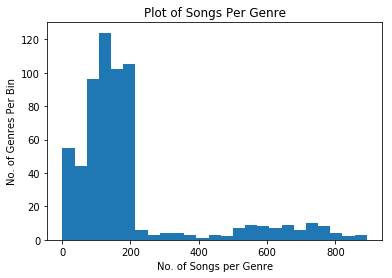

In [84]:
# 2. No. of songs per 'Genre':
genreSeries = df['Genre'].value_counts() # returns a Series
print(genreSeries.head(20))

# using the "square root of no. of samples" rule, to assign number of bins for the histogram
numBins = int(np.sqrt(numGenres))
print("\nNo. of bins: ", numBins)

# histogram
_ = plt.hist(genreSeries, bins = numBins)
_ = plt.xlabel('No. of Songs per Genre')
_ = plt.ylabel('No. of Genres Per Bin')
_ = plt.title("Plot of Songs Per Genre")
plt.show()

We see that the data largely separates in the number of songs found per genre. We could possibly separate the data between those genres that contain more than approximately 200 songs and those that don't.

In [85]:
# Preparing to separate data

genresLessThan200Songs = genreSeries[genreSeries < 200]
print("\nNo. of genres with less than 200 songs: ", len(genresLessThan200Songs))
print("\nTop 10 genres with less than 200 songs:\n", genresLessThan200Songs.head(10))
print("\nBottom 10 genres with less than 200 songs:\n", genresLessThan200Songs.tail(10))

genresMoreThan200Songs = genreSeries[genreSeries >= 200]
print("\nNo. of genres with 200 songs or more: ", len(genresMoreThan200Songs))
print("\nTop 10 genres with 200+ songs:\n", genresMoreThan200Songs.head(10))
print("\nBottom 10 genres with 200+songs:\n", genresMoreThan200Songs.tail(10))


No. of genres with less than 200 songs:  523

Top 10 genres with less than 200 songs:
 gauzepop                199
mexicanpoppunk          199
rootsreggae             199
finnishjazz             199
drumfunk                199
progressivedeathcore    199
finnishfolk             199
germantechno            199
deepnorteno             199
deepccm                 198
Name: Genre, dtype: int64

Bottom 10 genres with less than 200 songs:
 tijuanaelectronic    4
turkishelectronic    4
marchafunebre        4
slavicmetal          4
romanianindie        3
azeripop             2
russianelectronic    2
modernperformance    1
balticfolk           1
turkishhiphop        1
Name: Genre, dtype: int64

No. of genres with 200 songs or more:  102

Top 10 genres with 200+ songs:
 nuelectro               892
deepdeephouse           860
newrave                 857
alternativeamericana    855
organicambient          837
metalguitar             819
groovemetal             816
deepchill-out           813
toro

**Interpretation:** We see that near around the 200 song mark the data separates rather nicely, with a bulk of 523 genres having less than 200 songs, and about 102 genres having 200 or more songs. 

#### 3. How much does the 'Danceability' vary?

We know that some genres of music to be more suiting to dance, than others. If the data is widespread enough, down the line we could potentially check for this correlation. Else, we could conclude that this metric may not be very useful to us.

         Genre  Danceability
0  celticmetal         0.624
1  celticmetal         0.517
2  celticmetal         0.251
3  celticmetal         0.469
4  celticmetal         0.487
        Danceability
count  121808.000000
mean        0.552998
std         0.183774
min         0.000000
25%         0.430000
50%         0.566000
75%         0.693000
max         0.988000


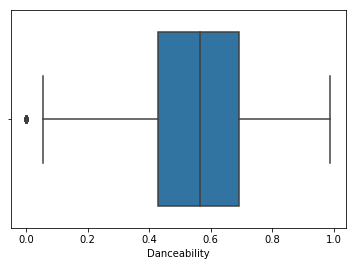

In [114]:
# 3. Spread of Danceability

danceability = df[['Genre', 'Danceability']]
print(danceability.head())
print(danceability.describe())
      
_ = sns.boxplot(danceability['Danceability'])

We see that danceability overall varies a lot, from 0.00 to 0.98. But we also see that 50% of the songs are between 0.4 to about 0.7, while the rest spread across to the ends. Let us separate by genres and see how the _means_ are spread.

In [96]:
def checkAndAdd(key, value, dictionary):
    """Function checks to see if the dictionary already has that key, and appends to the list accordingly"""
    if key in dictionary:
        dictionary[key].append(value)
    else: 
        dictionary[key] = []
        dictionary[key].append(value)

genre_danceability = {}
for index, row in danceability.iterrows():
    genre = row['Genre']
    dance = row['Danceability']
    checkAndAdd(genre, dance, genre_danceability)
    
print(len(genre_danceability.keys()))

# We're expecting no of keys to be 625

625


In [111]:
# Compute averages for each genre

danceMeans = pd.DataFrame(columns=['Genre', 'Danceability Means'])

for key,values in genre_danceability.items():
        danceMeans = danceMeans.append({'Genre' : key , 'Danceability Means' : np.mean(values)}, ignore_index=True)

# Sample output
print(danceMeans.head())

print(danceMeans.describe())

highlyDanceable = danceMeans[danceMeans['Danceability Means'] >= 0.7]
print(highlyDanceable.head(10))
print("\nHighly danceable genres: ", len(highlyDanceable))
    

            Genre  Danceability Means
0     celticmetal            0.431348
1      balkantrap            0.712968
2      slovakrock            0.563359
3   deepchill-out            0.656008
4  ghanaianhiphop            0.728909
       Danceability Means
count          625.000000
mean             0.543277
std              0.130031
min              0.124360
25%              0.466306
50%              0.547059
75%              0.639500
max              0.829373
                     Genre  Danceability Means
1               balkantrap            0.712968
4           ghanaianhiphop            0.728909
9           albanianhiphop            0.733178
28              minimaldub            0.746057
33            arabichiphop            0.703528
37  undergroundlatinhiphop            0.731341
60              darktechno            0.710190
62        deepbrazilianpop            0.711056
89               nuelectro            0.726848
95           minimaltechno            0.741178

Highly danceable gen

**Interpretation:** We see that the *Danceability* attribute has a very large spread, but a good majority exists between 0.4 and 0.7 - which are fairly danceable. We see that the genre means are spread out a little lesser. But the genres whose _means_ are 0.7 and above, are very danceable - and from a sample of 10 of them, we see that they logically fit that category.

#### 4. How much does the 'Instrumentalness' vary?

It may be worth exploring how it relates with popularity and the genre, depending on how instrumentalness is spread. 

         Genre  Instrumentalness  Popularity
0  celticmetal          0.206000          55
1  celticmetal          0.001910          21
2  celticmetal          0.000000           2
3  celticmetal          0.000111          50
4  celticmetal          0.000000          22
       Instrumentalness     Popularity
count     121808.000000  121808.000000
mean           0.236781      25.198961
std            0.355858      22.474217
min            0.000000       0.000000
25%            0.000002       4.000000
50%            0.001830      21.000000
75%            0.532000      42.000000
max            0.999000      96.000000


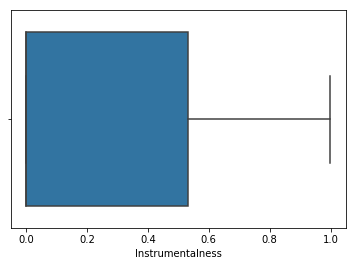

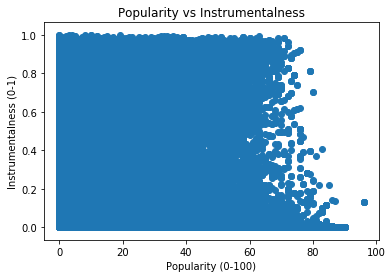

In [120]:
instrumentalness = df[['Genre', 'Instrumentalness', 'Popularity']]
print(instrumentalness.head())
print(instrumentalness.describe())
      
_ = sns.boxplot(instrumentalness['Instrumentalness'])
plt.show()

_ = plt.scatter(instrumentalness['Popularity'], instrumentalness['Instrumentalness'])
_ = plt.xlabel("Popularity (0-100)")
_ = plt.ylabel("Instrumentalness (0-1)")
_ = plt.title("Popularity vs Instrumentalness")
plt.show()

The scatter of instrumentalness against popularity did not yield anything useful, however, the boxplot of instrumentalness alone shows us how almost 75% of the data lies under 0.54. Let us explore this further by plotting the with the _means_ of the instrumentalness and popularity.

625
625
                 Genre  Instrumentalness Means  Popularity Means
0          celticmetal                0.217994         17.390013
1           balkantrap                0.005586         30.161290
2           slovakrock                0.001897         28.384615
3        deepchill-out                0.269835         34.409594
4       ghanaianhiphop                0.002709         47.636364
5                 e6fi                0.203373         17.277778
6              ostrock                0.037305         11.884615
7          slovakindie                0.035745         30.189655
8   persiantraditional                0.298809          6.859060
9       albanianhiphop                0.006021         24.339721
10         modernblues                0.076031         22.824011
11         canadianpop                0.026402         30.670350
12      portuguesefolk                0.095781         15.439640
13          belgianpop                0.116615         21.304940
14            run

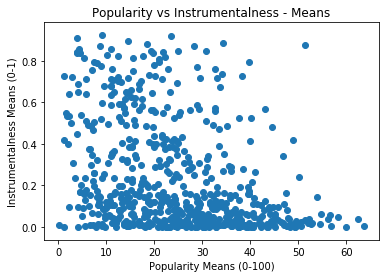

                      Genre  Instrumentalness Means  Popularity Means
15                 psychill                0.750965         15.527742
18              balletclass                0.879980         18.548589
22               dronemetal                0.614282         17.516949
28               minimaldub                0.810920         15.630790
39                dronefolk                0.658786         15.118252
45            deeplatinjazz                0.570618         13.764205
60               darktechno                0.820688         17.639148
75           organicambient                0.731838         18.954600
84                 fluxwork                0.564114         19.823651
90        psychedelictrance                0.725989         20.176768
95            minimaltechno                0.834732         19.638184
104           arpaparaguaya                0.710504          5.843575
116                  nlfolk                0.564839         16.821429
118     classicalper

In [134]:
instrumentalnessMeans = pd.DataFrame(columns=('Genre', 'Instrumentalness Means', 'Popularity Means'))

genre_instrumentalness = {}
genre_popularity = {}

for index, row in instrumentalness.iterrows():
    genre = row['Genre']
    instru = row['Instrumentalness']
    pop = row['Popularity']

    checkAndAdd(genre, instru, genre_instrumentalness)
    checkAndAdd(genre, pop, genre_popularity)

# We're expecting no of keys to be 625
print(len(genre_instrumentalness.keys()))
print(len(genre_popularity.keys()))

for key,values in genre_instrumentalness.items():
    instruMean = np.mean(values)
    popMean = np.mean(genre_popularity[key])
    instrumentalnessMeans = instrumentalnessMeans.append({'Genre' : key, 'Instrumentalness Means' : instruMean, 
                                                          'Popularity Means' : popMean}, ignore_index=True)

print(instrumentalnessMeans.head(20))

_ = plt.scatter(instrumentalnessMeans['Popularity Means'], instrumentalnessMeans['Instrumentalness Means'])
_ = plt.xlabel("Popularity Means (0-100)")
_ = plt.ylabel("Instrumentalness Means (0-1)")
_ = plt.title("Popularity vs Instrumentalness - Means")
plt.show()

# Highly instrumental genres
highlyInstru = instrumentalnessMeans[instrumentalnessMeans['Instrumentalness Means'] >= 0.54]
print(highlyInstru.head(20))
print("\nHighly instrumental genres: ", len(highlyInstru))

In [135]:
# Most instrumental genre
print("\nThe most instrumental genre is ", highlyInstru.loc[highlyInstru['Instrumentalness Means'].idxmax()])

# Most popular of the highly instrumental genres
print("\nThe most popular of the highly instrumental genres is ", highlyInstru.loc[highlyInstru['Popularity Means'].idxmax()])


The most instrumental genre is  Genre                     earlyromanticera
Instrumentalness Means             0.92298
Popularity Means                      9.11
Name: 615, dtype: object

The most popular of the highly instrumental genres is  Genre                     meditation
Instrumentalness Means      0.874916
Popularity Means             51.4122
Name: 620, dtype: object


**Interpretation:** We see that with the instrumentalness metric, we could see how it changes along with popularity and genre. After we isolated we started working with the _means_ across genre, for the instrumentalness and popularity metrics, the scatter makes a little more sense. We see that the scatter shows a strong population varying from very low to a reasonably high popularity, but retaining very little instrumentalness, while there is a scattered population of several other genres spread across a wide range of instrumentalness, but over a lower overall popularity of 30-40. 

Also, when we take a sample of the 1st 20 genres that are highly instrumental, we see that they logically fit, such as **_psychill_**, **_deeplatinjazz_** etc, which are known to be highly instrumental genres. 

Interestingly, the most instrumental genre in the dataset, **_earlyromanticera_**, has very **_low popularity_**, while the most popular genre that is also **_highly instrumental_** is **_meditation_**.

#### 5. Are there any songs that are NOT in a 4.0 'time_signature'?

Songs that are not in 4.0 time signature are not very common, and it may be interesting to see how they are spread. 

Also, a potential exploration for later would be to see how they vary in popularity against the 4.0 time signature songs.

           Name        Genre  time_signature  Popularity
0    YuveYuveYu  celticmetal             4.0          55
1   Gloryhammer  celticmetal             4.0          21
2        Nostos  celticmetal             4.0           2
3     Yggdrasil  celticmetal             4.0          50
4  Incense&Iron  celticmetal             4.0          22
121808
                 Name        Genre  time_signature  Popularity
16     ForgottenPaths  celticmetal             3.0          41
18          TheReturn  celticmetal             3.0          42
20        SonoftheSky  celticmetal             3.0          36
21  FireBloodandSteel  celticmetal             3.0          39
23     Fantasy\sWings  celticmetal             3.0          42
13101
[3. 1. 5. 0.]
10223
585
['celticmetal' 'balkantrap' 'deepchill-out' 'e6fi' 'ostrock']


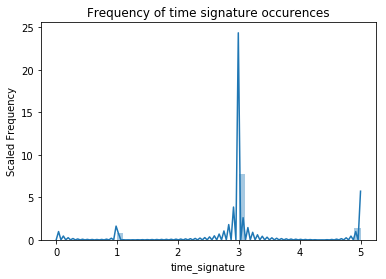

31
                                                   Name  \
10074                                  MilionYearSummer   
10475                                        Soluppgång   
10497                                              Yeah   
13064  \Zed\\\sDeadBaby-DialogueExcerptFromPulpFiction\   
17399                               OpenupLettheLightIn   
17840                                        TheBeatBox   
19858                                             Mills   
21295                                     CockaDoodleDo   
24911                                       UnRatoncito   
24921                                           LaVilla   

                        Genre  time_signature  Popularity  
10074              dronemetal             0.0          14  
10475              dronemetal             0.0           0  
10497              dronemetal             0.0           0  
13064    mexicanrock-and-roll             0.0           0  
17399                 worship             0.0  

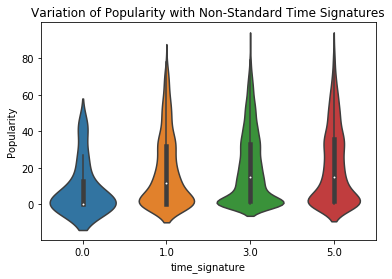

In [174]:
time_sig = df[['Name', 'Genre', 'time_signature', 'Popularity']]
print(time_sig.head())
print(len(time_sig))

nonStd_ts = time_sig[time_sig['time_signature'] != 4.0]
print(nonStd_ts.head())
print(len(nonStd_ts))

ts_types = nonStd_ts.time_signature.unique()
print(ts_types)
print(len(nonStd_ts[nonStd_ts['time_signature'] == 3.0]))

genre_types = nonStd_ts.Genre.unique()
print(len(genre_types))
# Sample of the genre types
print(genre_types[0:5])

_ = sns.distplot(nonStd_ts['time_signature'], hist=True)
_ = plt.ylabel('Scaled Frequency')
_ = plt.title('Frequency of time signature occurences')
plt.show()

zero_ts = nonStd_ts[nonStd_ts['time_signature'] == 0.0]
print(len(zero_ts))
print(zero_ts[0:10])

_ = sns.violinplot(x='time_signature', y='Popularity', data=nonStd_ts)
_ = plt.title("Variation of Popularity with Non-Standard Time Signatures")
plt.show()

**Interpretation:** We see that there seem to be 13101 songs out of 121808, that are not in the standard 4.0 time signature and they are spread across a wide variety of genres - 585 (out of the total 625). 

**So, the non-standard time signatures do not seem to be genre-specific.**

Of all the non-std time signatures, the _**3.0**_ seems to be the most frequent occurrence. As evidenced by the histogram, it seems to be present almost _**25 times**_ as much as the _**1.0**_ and over _**5 times**_ as much as the _**5.0**_. 

Interestingly, there is also a _**0.0**_ time signature that occurs _**31 times**_ in the dataset. It is spread across a variety of genres and is most likely a Spotify-introduced data error. 

All the non-standard time signatures seem to show increase in popularities as it goes from _**0.0**_ to _**5.0**_, with _**3.0**_ and _**5.0**_ having very similar distributions with a similar median and IQR.

#### 6. How much does the 'Tempo' vary?

It would be interesting to see the range of tempos in this data set. A later exploration would also be to see if popularity changes with tempo in any way.

                   Name             Genre    Tempo  Popularity
121810            Youth  britishindierock  127.741          44
121811        IFoundOut  britishindierock  146.986           1
121812           Animal  britishindierock  139.574           0
121813  PostBreak-UpSex  britishindierock  136.883          59
121814     WantYouSoBad  britishindierock  176.068          37
               Tempo     Popularity
count  121808.000000  121808.000000
mean      121.945146      25.198961
std        28.957195      22.474217
min         0.000000       0.000000
25%        99.988000       4.000000
50%       121.015000      21.000000
75%       139.939000      42.000000
max       248.066000      96.000000


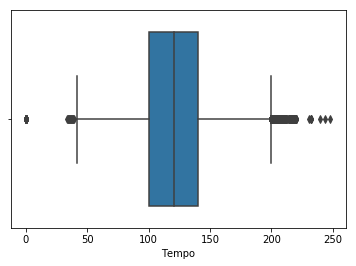

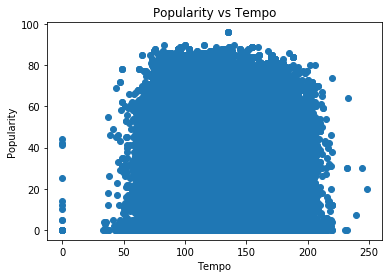

In [171]:
tempo = df[['Name','Genre', 'Tempo', 'Popularity']]
print(tempo.tail())
print(tempo.describe())

_ = sns.boxplot(tempo['Tempo'])
plt.show()

_ = plt.scatter(tempo['Tempo'], tempo['Popularity'])
_ = plt.xlabel('Tempo')
_ = plt.ylabel('Popularity')
_ = plt.title('Popularity vs Tempo')
plt.show()

**Interpretation:** The tempo metric signifies the BPM across the whole song on average, according to Spotify. From the box plot we see that the middle 50% is spread between 99 and 140. 

Popularity does not seem to vary in any particular way with Tempo.

#### 7. Does there exist any correlation between 'Danceability' and 'Energy' for a song? and vice-versa? (Can probably be plotted)

According to Spotify, the Energy metric is a perceptual measure of intensity and activity. We could see how the Energy varies with Danceability.
We could do the actual correlation in the EDA notebook.

                   Name  Danceability  Energy
121810            Youth         0.568   0.708
121811        IFoundOut         0.470   0.909
121812           Animal         0.272   0.918
121813  PostBreak-UpSex         0.402   0.902
121814     WantYouSoBad         0.482   0.839
        Danceability         Energy
count  121808.000000  121808.000000
mean        0.552998       0.648142
std         0.183774       0.246486
min         0.000000       0.000000
25%         0.430000       0.486000
50%         0.566000       0.690000
75%         0.693000       0.853000
max         0.988000       1.000000


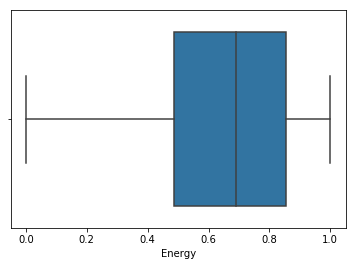

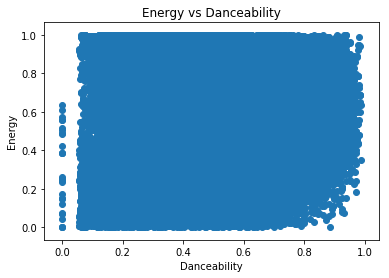

In [182]:
metrics1 = df[['Name', 'Danceability', 'Energy']]
print(metrics1.tail())
print(metrics1.describe())

_ = sns.boxplot(metrics1.Energy)
plt.show()

_ = plt.scatter(metrics1.Danceability, metrics1.Energy)
_ = plt.xlabel('Danceability')
_ = plt.ylabel('Energy')
_ = plt.title('Energy vs Danceability')
plt.show()

**Interpretation:** Though the summary statistics of Danceability and Energy seem to suggest that data lie in similar IQR ranges, the individual data points themselves do not seem to follow any specific pattern with each other. 

#### 8. Does there exist any correlation between 'Speechiness' and 'Instrumentalness'? (Can probably be plotted)

Would be interesting to see if these are anti-correlated in some way

                   Name  Instrumentalness  Speechness
121810            Youth          0.000528      0.0601
121811        IFoundOut          0.000000      0.0546
121812           Animal          0.009200      0.0625
121813  PostBreak-UpSex          0.004650      0.0469
121814     WantYouSoBad          0.244000      0.1000
       Instrumentalness     Speechness
count     121808.000000  121808.000000
mean           0.236781       0.083429
std            0.355858       0.099541
min            0.000000       0.000000
25%            0.000002       0.036100
50%            0.001830       0.048500
75%            0.532000       0.083200
max            0.999000       0.966000


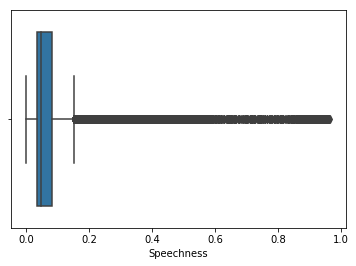

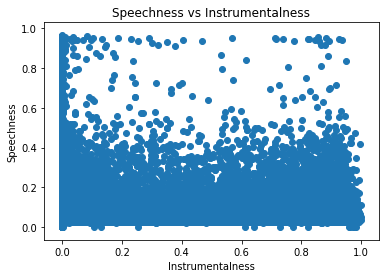

In [183]:
metrics2 = df[['Name', 'Instrumentalness', 'Speechness']]
print(metrics2.tail())
print(metrics2.describe())

_ = sns.boxplot(metrics2.Speechness)
plt.show()

_ = plt.scatter(metrics2.Instrumentalness, metrics2.Speechness)
_ = plt.xlabel('Instrumentalness')
_ = plt.ylabel('Speechness')
_ = plt.title('Speechness vs Instrumentalness')
plt.show()

**Interpretation:** Speechness seems to be spread over a small range under _**0.2**_, with outlier data points. The scatter shows a large population that varies a lot in _**instrumentalness**_ but varies only between _**0.0**_ and _**0.4**_ in _**speechness**_. Most of the data set is not very speechy. 

#### 9. Does there exist any correlation between 'Genre' and 'Popularity'?

          Popularity
count  121808.000000
mean       25.198961
std        22.474217
min         0.000000
25%         4.000000
50%        21.000000
75%        42.000000
max        96.000000


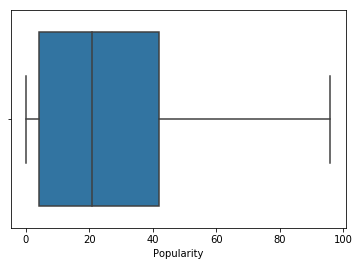

4632
279
['celticmetal' 'balkantrap' 'deepchill-out' 'ghanaianhiphop' 'ostrock'
 'albanianhiphop' 'modernblues' 'canadianpop' 'belgianpop' 'lapop'
 'balletclass' 'groovemetal' 'pianoblues' 'dreampop' 'swedishindiepop'
 'undergroundpowerpop' 'sungpoetry' 'mexicanrock-and-roll' 'belgianmetal'
 'raregroove' 'newrave' 'japanesedeathmetal' 'gothicmetal' 'worship'
 'undergroundlatinhiphop' 'norwegianmetal' 'zeuhl' 'oratory' 'mathpop'
 'romanianfolk' 'alternativeamericana' 'birminghamindie' 'bostonmetal'
 'go-go' 'tropicalhouse' 'spanishfolk' 'canadianrock' 'country'
 'liverpoolindie' 'gabba' 'substep' 'mandepop' 'doo-wop' 'salsa'
 'deepbrazilianpop' 'torontoindie' 'messianicpraise' 'blues-rock'
 'psychedelicfolk' 'reggaerock' 'germanhardcore' 'hongkongindie'
 'germanoi' 'organicambient' 'scratch' 'reading' 'beats' 'v-pop'
 'funkrock' 'fluxwork' 'alaskaindie' 'deepdeephouse' 'nuelectro'
 'jazzfusion' 'vaporpop' 'minimaltechno' 'danishpoprock' 'muzicacrestina'
 'metalguitar' 'hardglam' 'dmvrap

In [190]:
genre_pop = df[['Genre', 'Popularity']]
print(genre_pop.describe())

# Spread of popularity
_ = sns.boxplot(genre_pop['Popularity'])
plt.show()

# Top popularities - >70
tops = genre_pop[genre_pop['Popularity'] >= 70]
print(len(tops))
top_uniques = tops.Genre.unique()
print(len(top_uniques))

print(top_uniques)

**Interpretation:** _**279**_ out of _**625**_ genres seem to be our definition of _**top (>70)**_. And on visual inspection, they don't seem to be specific to only a few related genres. They seem to be spread across various parent genres. So there doesn't seem to be any strong correlation between the genre and popularity.

#### 10. How much does the 'Popularity' measure vary?

Answered within the previous question

**Interpretation:** 75% of the data lies under a popularity rating 43. 

#### 11. How many 'Genres' seem to show very low popularity?

Let us define that anything below a popularity of 20 and below are very low.

In [192]:
# lows

lows = genre_pop[genre_pop['Popularity'] <= 20]
print(lows.head(30))

lows_unique = lows.Genre.unique()
print(len(lows_unique))


           Genre  Popularity
2    celticmetal           2
22   celticmetal           1
25   celticmetal          12
30   celticmetal           1
32   celticmetal          12
50   celticmetal           1
52   celticmetal          12
60   celticmetal          17
61   celticmetal          20
66   celticmetal           0
68   celticmetal          20
72   celticmetal           0
74   celticmetal           0
75   celticmetal           0
77   celticmetal           0
79   celticmetal           0
81   celticmetal           0
85   celticmetal           0
88   celticmetal           0
90   celticmetal           0
91   celticmetal           0
92   celticmetal           0
94   celticmetal          16
95   celticmetal          12
96   celticmetal           0
99   celticmetal           0
100  celticmetal           0
101  celticmetal           0
104  celticmetal           0
105  celticmetal           0
622


**Interpretation:** There are songs of many of the same genres belonging to both high and low popularity groups. In this case some of the lowest ones include _**celticmetal**_

**Summary:** We found a few interesting things worth possibly exploring further in this data set. The salient features ofthis analysis area as below:

1. Over 121808 songs, there are 625 unique genres in this data set and they separate quite well in the number of songs that each genre has.

2. We explored a number of other characteristics such as _Danceability_, _Instrumentalness_, _Time Signature_, _Tempo_ etc. and also further explored how some of these vary with _Genre_ and _Popularity_.

3. For _Danceability_, we saw that 75% of the data was contained under 0.7 and while working with the mean of this metric across _Genre_, we saw that a good 70 genres were "highly danceable" (>0.7)

4. For _Instrumentalness_, after we worked with the genre means we saw that there is a population that varied in popularity from 0-60 but was overall low in instrumentalness. And we had 101 highly instrumental genres. We also varied this with popularity. We saw that the most instrumental genre had very low popularity - _earlyromanticera_. And the most popular of the highly instrumental genres was _meditation_.

5. For _Time Signatures_, we saw that there were a good _13101 songs_ with non-standard time signatures (not 4.0). These did not separate well on genres, and included _585_ out of the _625 genres_ in the 13101 songs. Of these songs, _3.0_ and _5.0_ were the most frequently occurring and also had _similar distributions, medians and IQR_, as evidenced by the violin plot.

6. For _Tempo_, the data was spread roughly between 40 and 200, with some outliers. It did not vary distinctly with popularity. 

7. _Danceability_ and _Energy_ did not vary distinctly.

8. The scatter of _Speechness_ and _Instrumentalness_, shows a distinct population which ranges from _0.0 to 0.4_ in _Speechness_ while varying from _0.0 through 1.0_ in _Instrumentalness_. This seems to be the majority of the data. So it doesn't vary distinctly with instrumentalness.

9. The metric of _Popularity_ by itself is spread across from 0-100, 75% of the data falls under 43. And it doesn't seem tobe spread across any specific genre distinctly. Some of the lowest genres include _celticmetal_, which shows values of _0_, implying that it was not listened to at all during that week. 